# Keras Classification

<span class="girk">We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.</span>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")


# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [3]:
# Tenure:Number of years for which the customer has been with the bank
# NumOfProducts : Number of bank products the customer is utilising
# Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 13)

In [6]:
df.isna().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [9]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True) # Reduundant columns

0    7963
1    2037
Name: Exited, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


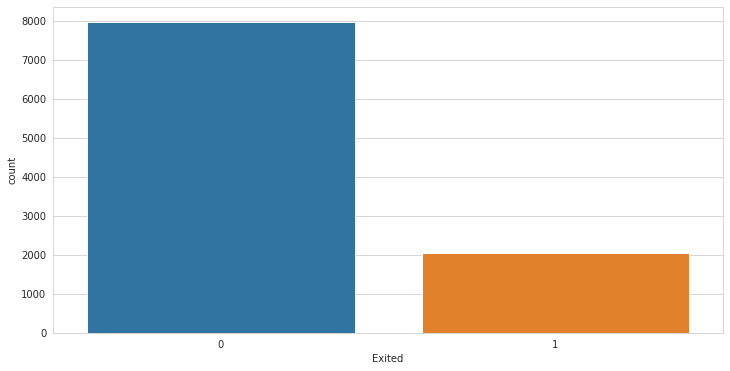

In [10]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]); # Imbalanced a little bit

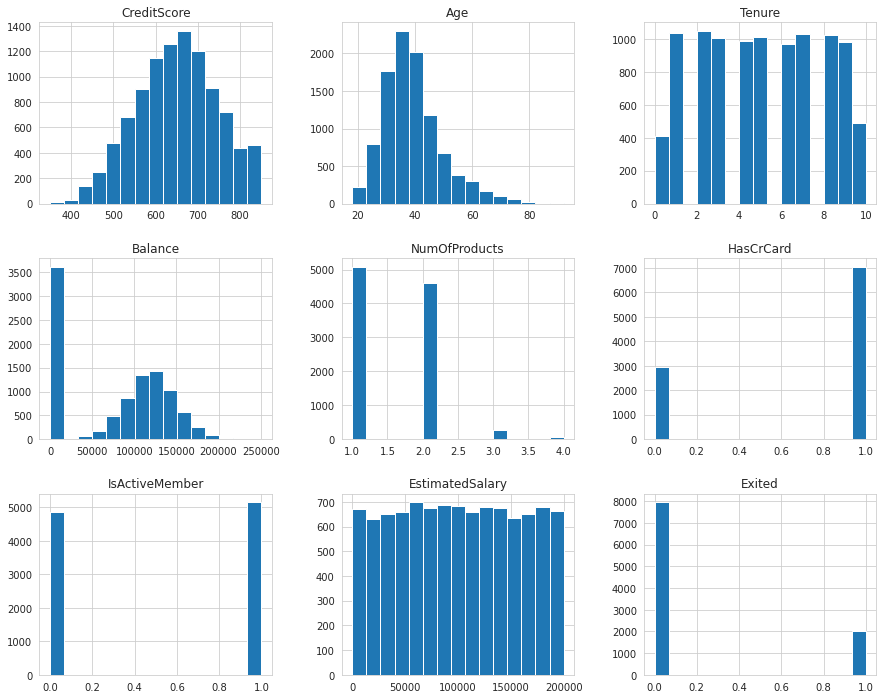

In [11]:
df.hist(figsize=(15, 12), bins=15);

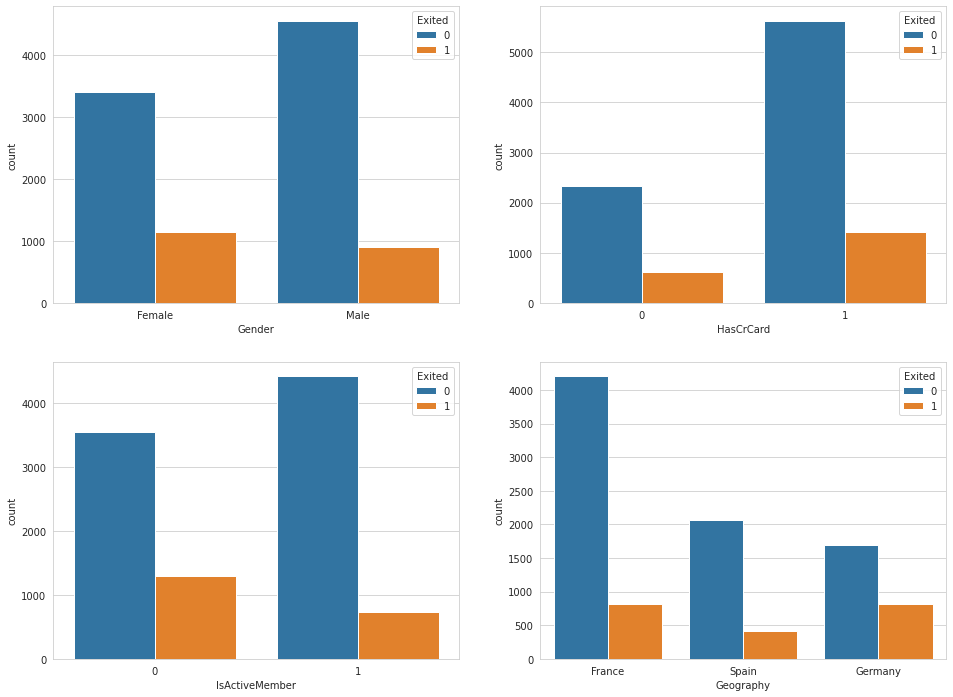

In [12]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


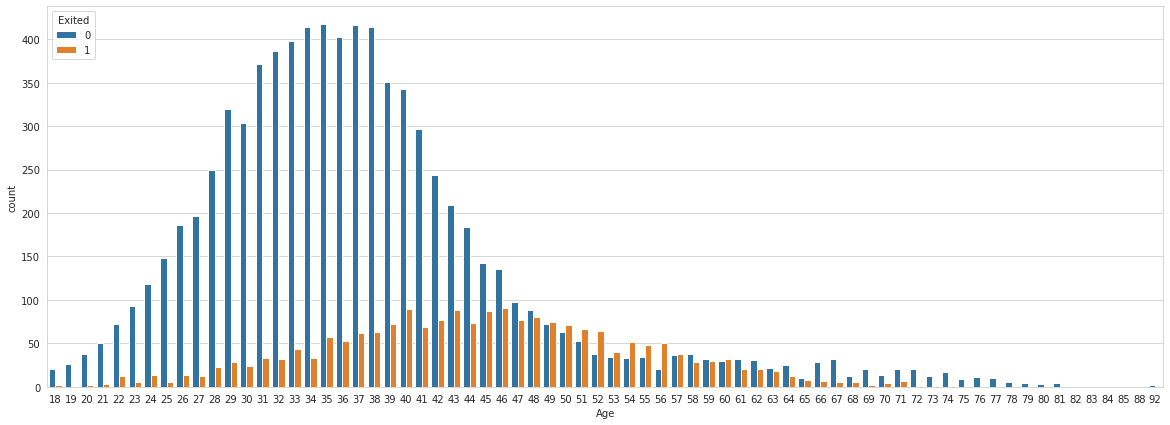

In [13]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

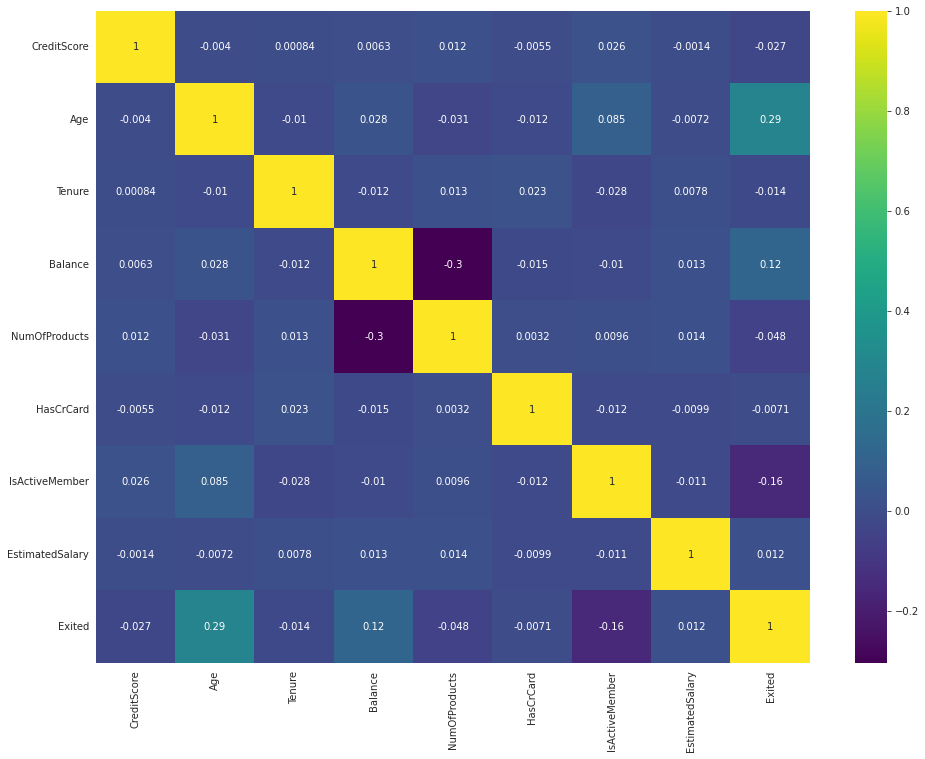

In [14]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis');

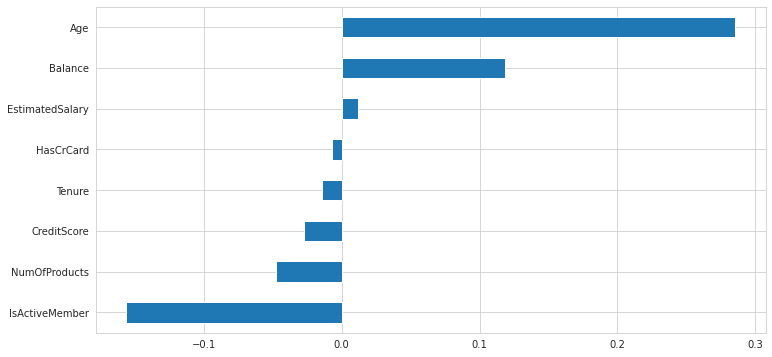

In [15]:
df.corr()['Exited'][:-1].sort_values().plot.barh();

In [16]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
2,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
3,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
4,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
5,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


In [17]:
df.shape

(10000, 12)

## Preprocessing of Data

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
X = df.drop('Exited', axis=1).values
y = df['Exited'].values
seed = 53
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling & Model Performance

### without class_weigth

In [22]:
X_train.shape

(9000, 11)

In [23]:
X_test.shape

(1000, 11)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # sigmoid activation function is good for output activation funcion for Multi-classification problems.

opt = Adam(learning_rate = 0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy", # binary_crossentropy is good Multi-classification loss function.
              metrics=["Recall"])

# Recall — the percentage of positive cases you caught. Important for this data.

In [26]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=25)
# The patience is often set somewhere between 10 and 100 (10 or 20 is more common), 
# But it really depends on your dataset and network.

In [27]:
model.fit(x=X_train_scaled,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/200
64/64 [==============================] - 2s 7ms/step - loss: 0.5710 - recall: 0.0875 - val_loss: 0.4911 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4726 - recall: 0.0000e+00 - val_loss: 0.4645 - val_recall: 0.0053
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4601 - recall: 0.0140 - val_loss: 0.4554 - val_recall: 0.0214
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4494 - recall: 0.0535 - val_loss: 0.4463 - val_recall: 0.0802
Epoch 5/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4390 - recall: 0.0899 - val_loss: 0.4411 - val_recall: 0.0856
Epoch 6/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4290 - recall: 0.1567 - val_loss: 0.4312 - val_recall: 0.1658
Epoch 7/200
64/64 [==============================] - 0s 5ms/step - loss: 0.4203 - recall: 0.1841 - val_loss: 0.4245 - val_recall: 0.1390
Epoch 8/200
64/64 [==============

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [29]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.571,0.087,0.491,0.000
1,0.473,0.000,0.464,0.005
2,0.460,0.014,0.455,0.021
3,0.449,0.053,0.446,0.080
4,0.439,0.090,0.441,0.086


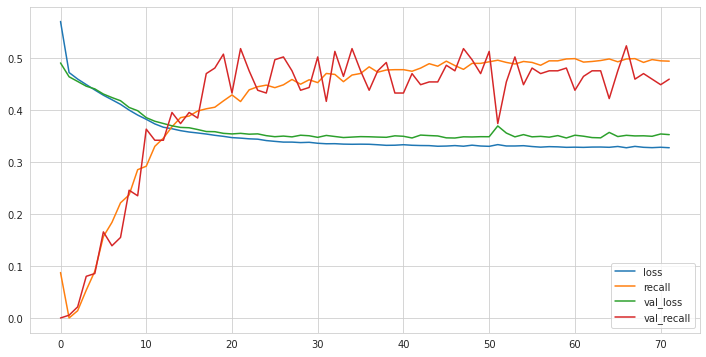

In [30]:
loss_df.plot();

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

In [32]:
y_test.shape

(1000,)

In [33]:
y_pred = model.predict(X_test_scaled)

32/32 [==============================] - 0s 1ms/step


In [34]:
y_pred

array([[0.02894606],
       [0.00694247],
       [0.02420437],
       [0.29089302],
       [0.3983508 ],
       [0.01872658],
       [0.15056606],
       [0.03747058],
       [0.64910704],
       [0.02631912],
       [0.03555942],
       [0.52066654],
       [0.13227355],
       [0.4595619 ],
       [0.01616993],
       [0.44374758],
       [0.1380423 ],
       [0.03061819],
       [0.68454915],
       [0.10742879],
       [0.5829329 ],
       [0.19744968],
       [0.01001596],
       [0.06565497],
       [0.6792614 ],
       [0.18685278],
       [0.21901794],
       [0.00822523],
       [0.2255227 ],
       [0.3502175 ],
       [0.3472812 ],
       [0.01498198],
       [0.07545125],
       [0.10859241],
       [0.00230508],
       [0.07862485],
       [0.08605758],
       [0.06875428],
       [0.05610887],
       [0.04633347],
       [0.7466089 ],
       [0.05820763],
       [0.9877694 ],
       [0.02100714],
       [0.01579459],
       [0.06195683],
       [0.4654218 ],
       [0.008

In [35]:
y_pred.shape

(1000, 1)

In [36]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32") # Manual 0.5 threshold

32/32 [==============================] - 0s 1ms/step


In [37]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [38]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32") # Manual 0.5 threshold
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[758  38]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.72      0.48      0.57       204

    accuracy                           0.85      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

In [39]:
y_pred_proba = model.predict(X_test_scaled)
y_pred_proba[:5]

32/32 [==============================] - 0s 1ms/step


array([[0.02894606],
       [0.00694247],
       [0.02420437],
       [0.29089302],
       [0.3983508 ]], dtype=float32)

In [40]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.21911923, 0.21827957, 0.21851453, 0.21875   , 0.21898598,
        0.21922246, 0.21945946, 0.21969697, 0.21993499, 0.22017354,
        0.2204126 , 0.22065217, 0.22089227, 0.2211329 , 0.22137405,
        0.22161572, 0.22185792, 0.22210066, 0.22124863, 0.22149123,
        0.22173436, 0.22197802, 0.22222222, 0.22246696, 0.22271224,
        0.22295806, 0.22320442, 0.22345133, 0.22369878, 0.22394678,
        0.22419534, 0.22444444, 0.2246941 , 0.22494432, 0.22519509,
        0.22544643, 0.22569832, 0.22595078, 0.22620381, 0.2264574 ,
        0.22671156, 0.22696629, 0.2272216 , 0.22747748, 0.22773393,
        0.22799097, 0.22824859, 0.22850679, 0.22876557, 0.22902494,
        0.2292849 , 0.22954545, 0.2298066 , 0.23006834, 0.23033067,
        0.23059361, 0.23085714, 0.23112128, 0.23138603, 0.23165138,
        0.23191734, 0.23218391, 0.23245109, 0.23271889, 0.23298731,
        0.23325635, 0.23352601, 0.2337963 , 0.23406721, 0.23433875,
        0.23461092, 0.23488372, 0.23515716, 0.23

32/32 [==============================] - 0s 1ms/step


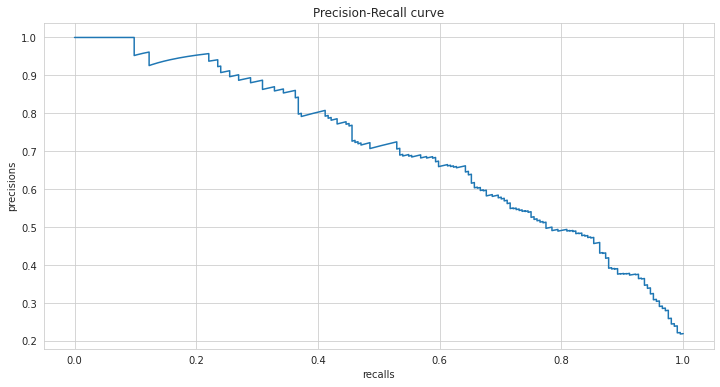

In [41]:
y_pred_proba = model.predict(X_test_scaled)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba) # it returns 3 arrays.
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve shows the performance of classification.

In [42]:
average_precision_score(y_test, y_pred_proba)

0.7082983609642443

### with class_weigth

In [43]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [44]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights # 1 class too many more than 0 class.

{0: 0.6278777731268314, 1: 2.454991816693944}

In [45]:
model.fit(x=X_train_scaled,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 1s 7ms/step - loss: 0.6717 - recall: 0.6464 - val_loss: 0.6289 - val_recall: 0.6096
Epoch 2/200
64/64 [==============================] - 0s 4ms/step - loss: 0.6329 - recall: 0.6397 - val_loss: 0.5985 - val_recall: 0.6471
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6171 - recall: 0.6616 - val_loss: 0.5942 - val_recall: 0.6738
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6033 - recall: 0.6707 - val_loss: 0.6085 - val_recall: 0.7433
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5901 - recall: 0.6981 - val_loss: 0.5423 - val_recall: 0.6471
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5763 - recall: 0.7078 - val_loss: 0.5884 - val_recall: 0.7219
Epoch 7/200
64/64 [==============================] - 0s 4ms/step - loss: 0.5644 - recall: 0.7169 - val_loss: 0.5459 - val_recall: 0.6578
Epoch 8/200
64/64 [======================

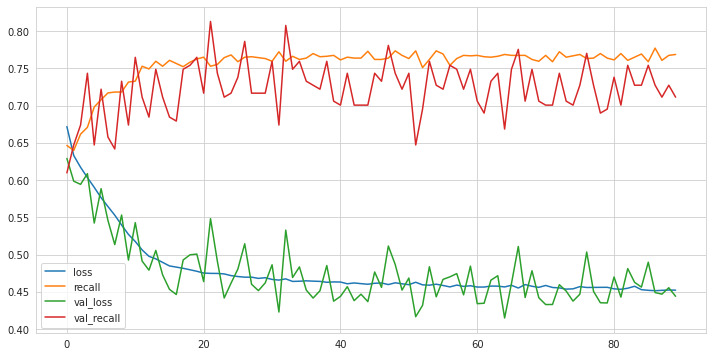

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [47]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32") # Manual 0.5 threshold.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#      precision    recall  f1-score   support

#  0       0.86      0.97      0.92       796
#  1       0.79      0.41      0.54       204


32/32 [==============================] - 0s 1ms/step
[[646 150]
 [ 54 150]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.50      0.74      0.60       204

    accuracy                           0.80      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.84      0.80      0.81      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 1ms/step


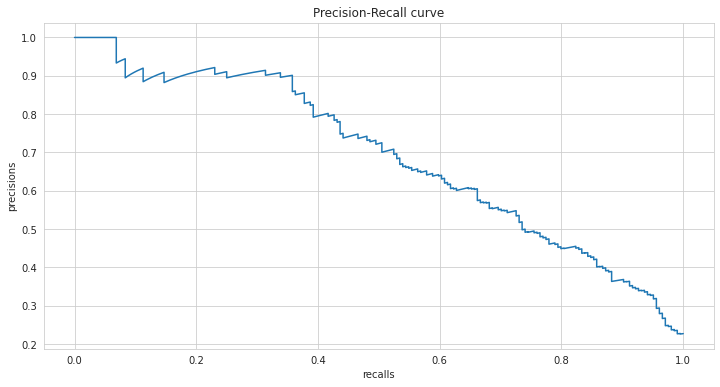

In [48]:
y_pred_proba = model.predict(X_test_scaled)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [49]:
average_precision_score(y_test, y_pred_proba)   # 0.6725

0.6908448517956259

## Final Model and Model Deployment

In [50]:
import joblib

joblib.dump(scaler, 'scaler_churn.joblib')

['scaler_churn.joblib']

In [51]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.002)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train_scaled,
          y=y_train,
          validation_data=(X_test_scaled, y_test), 
          callbacks=[early_stop],
          batch_size=256,
          epochs=200,
          verbose=1,
          class_weight=class_weights)    
# {'batch_size': 256,'learn_rate': 0.003,'optimizer': keras.optimizer_v2.adam.Adam}
# pay attention!! validation data 

Epoch 1/200
36/36 [==============================] - 1s 9ms/step - loss: 0.6797 - recall: 0.7218 - val_loss: 0.6818 - val_recall: 0.6422
Epoch 2/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6494 - recall: 0.6312 - val_loss: 0.6142 - val_recall: 0.5931
Epoch 3/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6284 - recall: 0.6263 - val_loss: 0.6116 - val_recall: 0.6373
Epoch 4/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6168 - recall: 0.6618 - val_loss: 0.6047 - val_recall: 0.6422
Epoch 5/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6062 - recall: 0.6743 - val_loss: 0.6069 - val_recall: 0.6716
Epoch 6/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5954 - recall: 0.6983 - val_loss: 0.5883 - val_recall: 0.6765
Epoch 7/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5839 - recall: 0.6978 - val_loss: 0.5605 - val_recall: 0.6667
Epoch 8/200
36/36 [======================

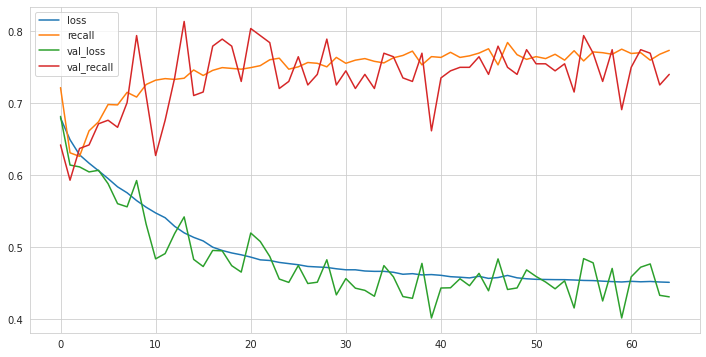

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [53]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  41314.07421875
recall :  0.8970588445663452


In [54]:
model.save('model_churn.h5')

### Prediction

In [55]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 1, dtype: float64

In [56]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [57]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 61ms/step


array([[1]], dtype=int32)

In [58]:
df["Exited"].iloc[0]

1

## Comparison with ML

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
log_model=LogisticRegression(class_weight = 'balanced')

log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[568 228]
 [ 61 143]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       796
           1       0.39      0.70      0.50       204

    accuracy                           0.71      1000
   macro avg       0.64      0.71      0.65      1000
weighted avg       0.80      0.71      0.74      1000



### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_model = RandomForestClassifier(class_weight='balanced')

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[768  28]
 [115  89]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.76      0.44      0.55       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.73      1000
weighted avg       0.85      0.86      0.84      1000



### LGBM

In [63]:
from lightgbm import LGBMClassifier

In [64]:
lgb_model = LGBMClassifier(random_state = seed , learning_rate = 0.3 , max_depth = 3 )

In [65]:
# gb_model = GridSearchCV(lgb_model , 
#                          param_grid = {'n_estimators' : [100,150,300,500,800] , 'learning_rate' : [0.01,0.03,0.05,0.08] , 'max_depth' : [2,3,5,8]} , 
#                         cv = 5 , scoring = 'neg_root_mean_squared_error').fit(X_train_scaled , y_train)}

In [66]:
lgb_model.fit(X_train_scaled , y_train)

LGBMClassifier(learning_rate=0.3, max_depth=3, random_state=53)

In [67]:
y_pred = lgb_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[755  41]
 [101 103]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.72      0.50      0.59       204

    accuracy                           0.86      1000
   macro avg       0.80      0.73      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
lgb_vanilla = LGBMClassifier(random_state = seed)

param_grid = {'learning_rate' : [0.01 , 0.03 , 0.05 , 0.08] , 'max_depth' : [1,3,5,8] , 'n_estimators' : [150,300,500,750] , 'col_sample_bytree' : [1,0.8,0.5]}

lgb_grid_model = GridSearchCV(lgb_vanilla , param_grid = param_grid , cv = 5 , n_jobs = -1 ).fit(X_train_scaled , y_train)

In [70]:
lgb_grid_model.best_score_

0.8654444444444446

In [71]:
lgb_grid_model.best_params_

{'col_sample_bytree': 1,
 'learning_rate': 0.03,
 'max_depth': 3,
 'n_estimators': 300}

In [72]:
# # {'col_sample_bytree': 1,
#  'learning_rate': 0.03,
#  'max_depth': 3,
#  'n_estimators': 300}

In [73]:
y_pred = lgb_grid_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[766  30]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.75      0.45      0.56       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



In [74]:
# sorted(sklearn.metrics.SCORERS.keys())

In [75]:
# Done